# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


C:\Users\haydencordeiro\AppData\Local\Temp\ipykernel_26296\3822599577.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Data Loading

In [2]:
df = pd.read_excel('./data/population_ghi_unemploment_yearwise_import export_africa_sheet.xlsx')
df

,Year,Population,GHI,Unemployment Above age 15,Unemployment between age 15-24,Unemployment Above age 25+,Share of agricultural land in South Africa 2000-2020 in percentage,People employed in agricultural sector in millions,Total employment in Africa 2010-2021(In Millions),Import (US$ Thousand),Export (US$ Thousand),NET OFFICIAL DEVELOPMENT ASSISTANCE AND AID,CREDIT RECEIVED FROM OTHER COUNTRIES IN BILLIONS,GASOLINE(USD)
0,1960,277118493,58.600464,9.481062,15.990643,5.855937,83.754950,43.362054,-113.816669,-4.280000e+07,-5.500000e+07,0.597,-121248.901500,-0.382550
1,1961,283779876,58.262490,9.570610,16.011023,6.001037,83.730961,45.402956,-102.516669,-4.110000e+07,-5.540000e+07,0.798,-120141.937700,-0.321401
2,1962,290712155,57.919486,9.414767,15.847811,5.871723,83.682760,47.175804,-91.091668,-3.900000e+07,-4.720000e+07,0.911,-119858.622400,-0.325281
3,1963,297898741,57.558272,9.451991,15.863546,5.945618,83.570931,49.944100,-80.858335,-3.640000e+07,-4.720000e+07,0.904,-121848.938700,-0.296721
4,1964,305365652,56.318315,9.389307,15.946707,5.897624,83.470854,50.208782,-75.891668,-3.720000e+07,-4.830000e+07,1.010,-108524.463400,-0.269731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2018,1252369090,25.211270,9.061706,17.975662,7.309926,79.420000,215.610000,441.400000,5.680835e+07,7.766913e+07,50.890,65868.000000,1.060000
59,2019,1283595475,25.236349,9.147912,18.148882,7.419412,79.420000,220.000000,453.600000,5.352592e+07,7.118801e+07,53.080,76312.000000,1.150000
60,2020,1315356983,25.261429,9.895824,19.603206,8.048294,79.420000,223.480000,451.200000,4.274483e+07,5.508914e+07,66.890,83004.000000,0.990000
61,2021,1347125535,25.321429,10.147794,19.492500,8.401750,79.420000,229.330000,466.100000,4.816218e+07,6.412994e+07,62.290,73684.906474,1.280000


# Handle Missing Data if Any

In [3]:

print(df.isnull().sum())
df.fillna(df.mean(), inplace=True)

Year                                                                  0
Population                                                            0
GHI                                                                   0
Unemployment Above age 15                                             0
Unemployment between age 15-24                                        0
Unemployment Above age 25+                                            0
Share of agricultural land in South Africa 2000-2020 in percentage    0
People employed in agricultural sector in millions                    0
Total employment in Africa 2010-2021(In Millions)                     0
Import (US$ Thousand)                                                 0
Export (US$ Thousand)                                                 0
NET OFFICIAL DEVELOPMENT ASSISTANCE AND AID                           0
CREDIT RECEIVED FROM OTHER COUNTRIES IN BILLIONS                      0
GASOLINE(USD)                                                   

# Data Visualizations and PreProcessing

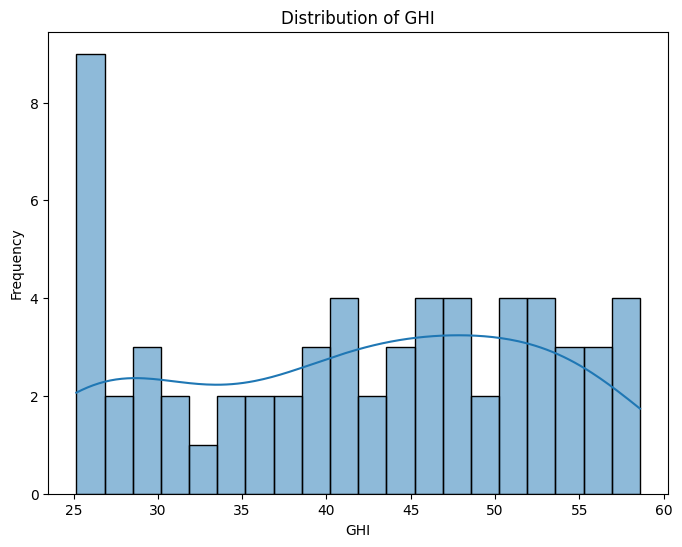

In [4]:
plt.figure(figsize=(8, 6))
sns.histplot(df['GHI'], bins=20, kde=True)
plt.title('Distribution of GHI')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.show()

In [5]:
skewness = df['GHI'].skew()
print(f"Skewness of GHI distribution: {skewness}")

Skewness of GHI distribution: -0.18835465217257497


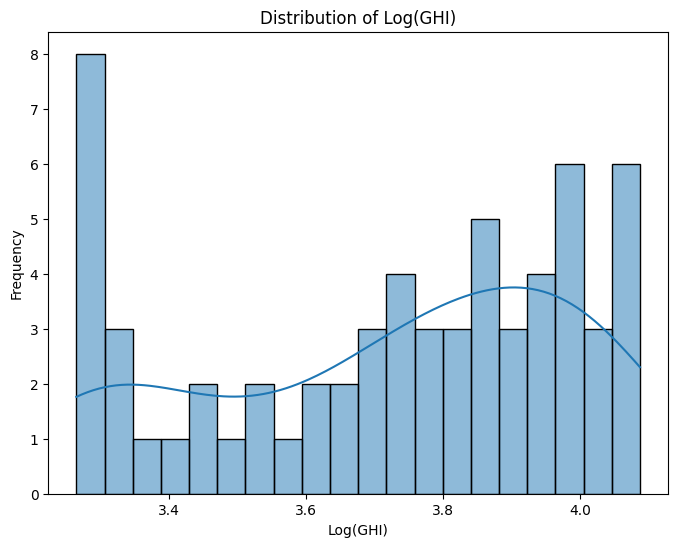

In [6]:
df['log_GHI'] = np.log1p(df['GHI'])

# Plot the transformed distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['log_GHI'], bins=20, kde=True)
plt.title('Distribution of Log(GHI)')
plt.xlabel('Log(GHI)')
plt.ylabel('Frequency')
plt.show()

# Feature Identification

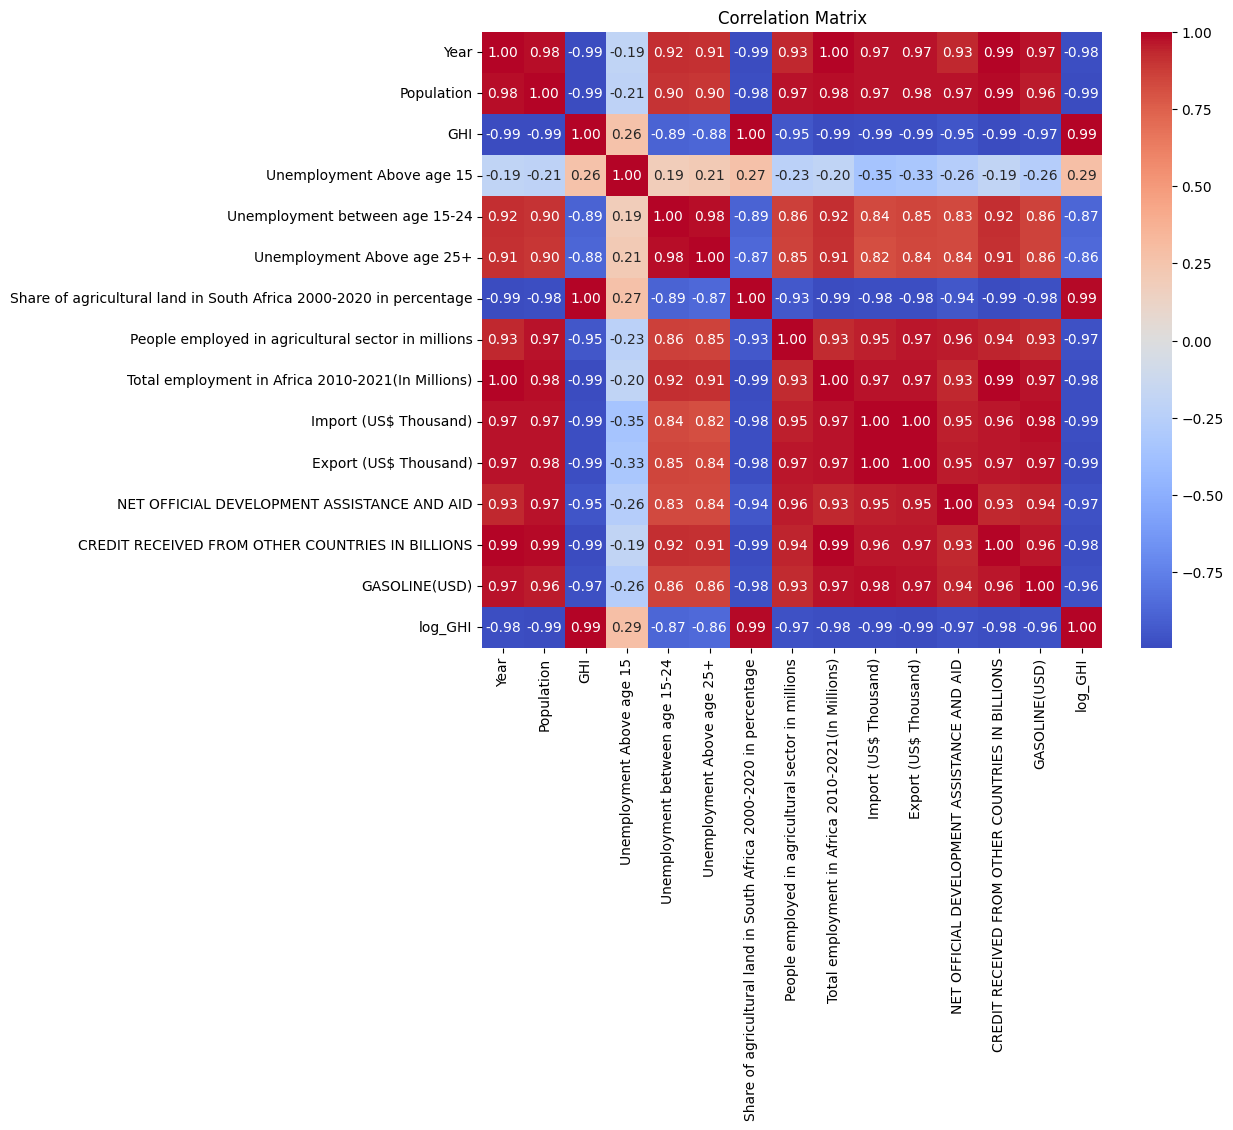

Selected Features:
['Population', 'Unemployment between age 15-24', 'Unemployment Above age 25+', 'Share of agricultural land in South Africa 2000-2020 in percentage', 'People employed in agricultural sector in millions', 'Total employment in Africa 2010-2021(In Millions)', 'Import (US$ Thousand)', 'Export (US$ Thousand)', 'NET OFFICIAL DEVELOPMENT ASSISTANCE AND AID', 'CREDIT RECEIVED FROM OTHER COUNTRIES IN BILLIONS', 'GASOLINE(USD)']


In [7]:
correlation_matrix = df.corr()

# Plot the heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Filter features highly correlated with GHI (absolute correlation > 0.5)
selected_features = correlation_matrix['GHI'].abs() > 0.5
selected_features = selected_features.drop(['GHI', 'log_GHI', 'Year'])  # Exclude GHI and log_GHI from selected features
selected_features = selected_features[selected_features].index.tolist()

print("Selected Features:")
print(selected_features)

In [8]:
# Listing the features that we wil be skipping
difference = [item for item in df.columns if item not in selected_features]
difference

['Year', 'GHI', 'Unemployment Above age 15', 'log_GHI']

# Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Split Data into Training and Testing Sets
X_selected = df[selected_features]  # Select features based on correlation analysis
y = df['log_GHI']  # Original GHI values

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 2: Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Evaluate Model Performance
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print("Model Evaluation:")
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")


Model Evaluation:
Train RMSE: 0.009985801114336966
Test RMSE: 0.01693892295407399


In [10]:
coefficients = pd.DataFrame({'Feature': X_selected.columns, 'Coefficient': model.coef_})
print("Coefficients:")
print(coefficients)

Coefficients:
                                              Feature   Coefficient
0                                          Population -2.762172e-10
1                      Unemployment between age 15-24 -1.613114e-02
2                          Unemployment Above age 25+  7.518252e-02
3   Share of agricultural land in South Africa 200...  5.565035e-02
4   People employed in agricultural sector in mill... -2.607874e-04
5   Total employment in Africa 2010-2021(In Millions)  2.161735e-04
6                               Import (US$ Thousand) -8.340790e-10
7                               Export (US$ Thousand) -5.624446e-10
8         NET OFFICIAL DEVELOPMENT ASSISTANCE AND AID -2.109836e-03
9    CREDIT RECEIVED FROM OTHER COUNTRIES IN BILLIONS -1.385088e-06
10                                      GASOLINE(USD)  5.870406e-02


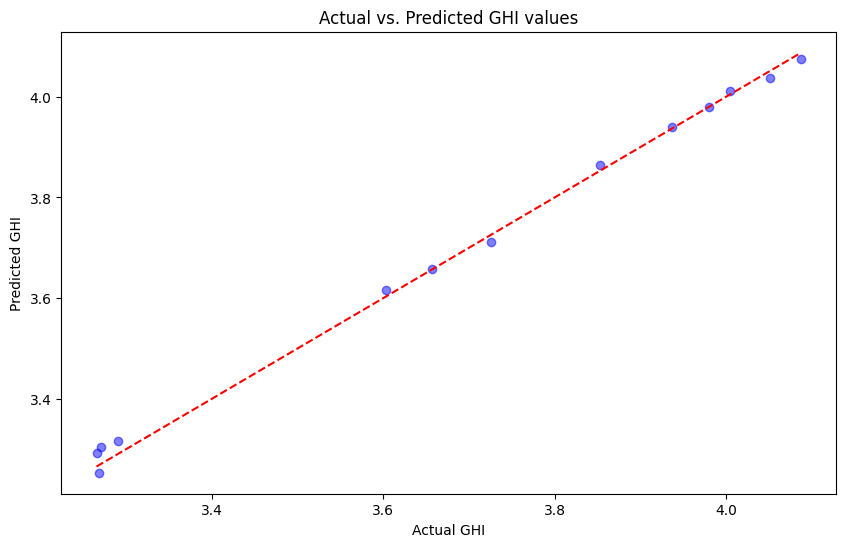

In [11]:
# Visualize actual vs. predicted GHI values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Actual vs. Predicted GHI values')
plt.xlabel('Actual GHI')
plt.ylabel('Predicted GHI')
plt.show()

In [12]:
X_test.columns
coefficients = model.coef_
intercept = model.intercept_

# Get the feature names
feature_names = X_test.columns

# Construct the equation string
equation = f"y = {intercept}"
for i in range(len(coefficients)):
    equation += f" + ({coefficients[i]} * {feature_names[i]})"

print(equation)

y = -0.8669852657475063 + (-2.7621721669895485e-10 * Population) + (-0.01613113922208811 * Unemployment between age 15-24) + (0.07518252018949834 * Unemployment Above age 25+) + (0.05565035260551837 * Share of agricultural land in South Africa 2000-2020 in percentage) + (-0.00026078737566095683 * People employed in agricultural sector in millions) + (0.00021617347764240835 * Total employment in Africa 2010-2021(In Millions)) + (-8.340789881683408e-10 * Import (US$ Thousand)) + (-5.624445822277613e-10 * Export (US$ Thousand)) + (-0.0021098356579354128 * NET OFFICIAL DEVELOPMENT ASSISTANCE AND AID) + (-1.3850880512587462e-06 * CREDIT RECEIVED FROM OTHER COUNTRIES IN BILLIONS) + (0.05870405788032284 * GASOLINE(USD))


# Random Forest

In [13]:
from sklearn.ensemble import RandomForestRegressor

# Step 1: Train a Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 2: Evaluate Random Forest Model Performance
rf_train_predictions = rf_model.predict(X_train)
rf_test_predictions = rf_model.predict(X_test)

rf_train_rmse = np.sqrt(mean_squared_error(y_train, rf_train_predictions))
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_predictions))

print("Random Forest Model Evaluation:")
print(f"Train RMSE: {rf_train_rmse}")
print(f"Test RMSE: {rf_test_rmse}")


Random Forest Model Evaluation:
Train RMSE: 0.005265495106770553
Test RMSE: 0.010887763012424478


# Storing Models

In [14]:
import joblib

# Save the trained model to a file
joblib.dump(rf_model, 'random_forest_model_new.pkl')
joblib.dump(model, 'linear_regression_model_new.pkl')


['linear_regression_model_new.pkl']